* [Mapping of concepts](https://ohdsi.github.io/CommonDataModel/vocabulary.html)
* [OMOP CDM](https://ohdsi.github.io/CommonDataModel/cdm54.html)
* [Chapter 6. Extract Transform Load](https://ohdsi.github.io/TheBookOfOhdsi/ExtractTransformLoad.html)

In [ ]:
import zipfile, shutil

zipfile.ZipFile('WhiteRabbit_v0.10.8a.zip').extractall('WhiteRabbit')

#shutil.move('WhiteRabbit/WhiteRabbit_v0.10.8a/', '/')

# INSPIRE dataset

In [2]:
import pandas as pd


# loading INSPIRE dataset
input_path = 'inspire'
df_diag = pd.read_csv(f'{input_path}/diagnosis.csv')
df_labs = pd.read_csv(f'{input_path}/labs.csv')
df_medi = pd.read_csv(f'{input_path}/medications.csv')
df_op = pd.read_csv(f'{input_path}/operations.csv')
df_vitals = pd.read_csv(f'{input_path}/vitals.csv')
df_ward = pd.read_csv(f'{input_path}/ward_vitals.csv')

In [21]:
print(f'diagnosis  : {list(df_diag.columns)}')
print(f'labs       : {list(df_labs.columns)}')
print(f'medications: {list(df_medi.columns)}')
print(f'operations : {list(df_op.columns)}')
print(f'vitals     : {list(df_vitals.columns)}')
print(f'ward vitals: {list(df_ward.columns)}')

diagnosis  : ['subject_id', 'chart_time', 'icd10_cm']
labs       : ['subject_id', 'chart_time', 'item_name', 'value']
medications: ['subject_id', 'chart_time', 'drug_name', 'route']
operations : ['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex', 'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype', 'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time', 'admission_time', 'discharge_time', 'anstart_time', 'anend_time', 'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time', 'inhosp_death_time']
vitals     : ['op_id', 'subject_id', 'chart_time', 'item_name', 'value']
ward vitals: ['subject_id', 'chart_time', 'item_name', 'value']


In [3]:
df_diag

,subject_id,chart_time,icd10_cm
0,128748700,1440,R35
1,109644621,-1440,S02
2,189240010,-40320,C18
3,189240010,-1440,S42
4,197356761,-256320,N40
...,...,...,...
1888371,195277881,652320,C64
1888372,195277881,662400,C64
1888373,195277881,924480,C64
1888374,155658270,24480,K81


In [4]:
df_labs

,subject_id,chart_time,item_name,value
0,133338290,86155,total_protein,7.00
1,133338290,86155,sodium,141.00
2,133338290,86155,potassium,4.40
3,133338290,86155,platelet,151.00
4,133338290,93150,glucose,123.00
...,...,...,...,...
8490056,155658270,35270,rbc,4.61
8490057,155658270,35270,hb,14.70
8490058,155658270,35270,hct,43.50
8490059,155658270,35270,platelet,251.00


In [5]:
df_medi

,subject_id,chart_time,drug_name,route
0,189345310,29210,sucralfate,po
1,189345310,29520,sucralfate,po
2,189345310,29340,ambroxol,po
3,189345310,29580,ambroxol,po
4,189345310,29340,magnesium oxide,po
...,...,...,...,...
3887691,127026720,2025,flomoxef,iv
3887692,127026720,2710,flomoxef,iv
3887693,127026720,2070,ofloxacin,ex
3887694,127026720,2550,ibuprofen/arginine,po


In [31]:
len(df_op['subject_id'].unique())

39797

In [6]:
df_op

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,491416905,153073110,210586983,NaN,1440,50,F,62.0,160.0,Asian,...,2565.0,0,15840,2270.0,2580.0,NaN,NaN,NaN,NaN,NaN
1,467425045,134213281,225860669,NaN,1440,60,F,62.0,154.0,Asian,...,2150.0,0,5760,2070.0,2160.0,NaN,NaN,NaN,NaN,NaN
2,461473883,134195201,265770645,NaN,1440,35,F,50.0,160.0,Asian,...,2525.0,0,7200,2380.0,2530.0,NaN,NaN,NaN,NaN,NaN
3,439560439,163619571,279388936,NaN,0,75,F,65.0,154.0,Asian,...,565.0,0,0,545.0,570.0,NaN,NaN,NaN,NaN,NaN
4,459562341,132888590,267511777,NaN,0,60,F,53.0,149.0,Asian,...,725.0,0,0,700.0,725.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52131,434274916,145733500,263951059,NaN,1440,40,F,66.0,159.0,Asian,...,2570.0,0,5760,2355.0,2575.0,NaN,NaN,NaN,NaN,NaN
52132,482567265,179496761,256199016,NaN,1440,60,F,50.0,156.0,Asian,...,2630.0,0,7200,2525.0,2630.0,NaN,NaN,NaN,NaN,NaN
52133,497190091,118074180,251662045,NaN,1440,65,M,79.0,182.0,Asian,...,2070.0,0,10080,1925.0,2085.0,NaN,NaN,NaN,NaN,NaN
52134,490768535,108082620,219922270,NaN,1440,70,M,75.0,174.0,Asian,...,2550.0,0,7200,2425.0,2565.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df_vitals

,op_id,subject_id,chart_time,item_name,value
0,428563245,155496940,1920,nibp_sbp,142.0
1,428563245,155496940,1920,nibp_dbp,60.0
2,428563245,155496940,1920,nibp_mbp,86.0
3,428563245,155496940,1920,o2,0.0
4,428563245,155496940,1920,hs,0.0
...,...,...,...,...,...
26305131,447098707,159399111,1511530,nibp_dbp,94.0
26305132,447098707,159399111,1511530,nibp_mbp,123.0
26305133,447098707,159399111,1511530,spo2,100.0
26305134,447098707,159399111,1511535,hr,80.0


In [9]:
df_ward

,subject_id,chart_time,item_name,value
0,118030121,-825,spo2,99.0
1,118030121,-825,nibp_sbp,133.0
2,118030121,-825,hr,57.0
3,118030121,-825,nibp_dbp,68.0
4,118030121,-825,bt,36.1
...,...,...,...,...
16869859,155523991,6465,iabp,1.0
16869860,155523991,6480,iabp,1.0
16869861,155523991,6540,iabp,1.0
16869862,155523991,6570,iabp,1.0


## Cases with multiple admissions

In [49]:
subject_op.iloc[:, [2] + list(range(15,27))].groupby('hadm_id', sort=False).agg(['min', 'max'])

,orin_time,orout_time,opstart_time,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time
hadm_id,,,,,,,,,,,,
219176539,19545,19820,19560.0,19810.0,0,72000,19550.0,19810.0,NaN,NaN,NaN,NaN
273709114,551980,552330,552040.0,552320.0,550080,560160,552000.0,552325.0,NaN,NaN,NaN,NaN
296786290,2350720,2350845,2350755.0,2350835.0,2348640,2352960,2350735.0,2350835.0,NaN,NaN,NaN,NaN
226122034,2762630,2763105,2762670.0,2763090.0,2759040,2786400,2762635.0,2763100.0,NaN,NaN,NaN,NaN
266274567,2880810,2880930,2880840.0,2880920.0,2875680,2897280,2880820.0,2880925.0,NaN,NaN,NaN,NaN
219035965,3095310,3095600,3095345.0,3095580.0,3093120,3108960,3095315.0,3095600.0,NaN,NaN,NaN,NaN
204747534,4012305,4012455,4012355.0,4012450.0,4008960,4021920,4012310.0,4012450.0,NaN,NaN,NaN,NaN


In [34]:
subject_op

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
387,477332398,132796950,219176539,NaN,1440,70,F,53.0,151.0,Asian,...,2750.0,0,72000,1925.0,2750.0,NaN,NaN,NaN,NaN,NaN
497,446717537,132796950,219176539,NaN,18720,70,F,53.0,151.0,Asian,...,19810.0,0,72000,19550.0,19810.0,NaN,NaN,NaN,NaN,NaN
5778,415876373,132796950,273709114,NaN,551520,70,F,53.0,151.0,Asian,...,552320.0,550080,560160,552000.0,552325.0,NaN,NaN,NaN,NaN,NaN
23750,467249165,132796950,296786290,NaN,2350080,75,F,65.0,158.0,Asian,...,2350835.0,2348640,2352960,2350735.0,2350835.0,NaN,NaN,NaN,NaN,NaN
27655,422760627,132796950,226122034,NaN,2761920,75,F,65.0,158.0,Asian,...,2763090.0,2759040,2786400,2762635.0,2763100.0,NaN,NaN,NaN,NaN,NaN
28863,499275799,132796950,266274567,NaN,2880000,75,F,65.0,158.0,Asian,...,2880920.0,2875680,2897280,2880820.0,2880925.0,NaN,NaN,NaN,NaN,NaN
30940,436021342,132796950,219035965,NaN,3094560,75,F,65.0,158.0,Asian,...,3095580.0,3093120,3108960,3095315.0,3095600.0,NaN,NaN,NaN,NaN,NaN
39924,481828287,132796950,204747534,24135.0,4011840,75,F,65.0,158.0,Asian,...,4012450.0,4008960,4021920,4012310.0,4012450.0,NaN,NaN,NaN,NaN,NaN


## EDA

In [80]:
idx = 0
list_df = [df_diag, df_labs, df_medi, df_vitals, df_ward]
list_name = ['diagnosis', 'labs', 'medications', 'vitals', 'ward']
df_obs = pd.DataFrame(columns=['subject_id', 'op_id', 'hadm_id', 'first_time', 'last_time'])
for _, row in df_op.iterrows():
    subject_id = row['subject_id']
    if subject_id in df_obs['subject_id']:
        continue
    
    df_obs.loc[idx] = row[['subject_id', 'op_id', 'hadm_id']].tolist() + [row[15:27].min(), row[15:27].max()]
    
    df_chart = pd.DataFrame()
    for i, df in enumerate(list_df):
        df1 = df[df['subject_id']==subject_id][['subject_id','chart_time']]
        df1['source'] = list_name[i]
        print(df1)
        print(df1['chart_time'].min(), df1['chart_time'].max())
        df_chart = pd.concat([df_chart, df1])
            
    idx = idx + 1
    asdf

         subject_id  chart_time     source
922115    153073110       -8640  diagnosis
922116    153073110       -8640  diagnosis
922117    153073110           0  diagnosis
985748    153073110      -18720  diagnosis
985749    153073110       -8640  diagnosis
985750    153073110       41760  diagnosis
985751    153073110      142560  diagnosis
985752    153073110      142560  diagnosis
985753    153073110      233280  diagnosis
985754    153073110      233280  diagnosis
985755    153073110      354240  diagnosis
985756    153073110      354240  diagnosis
985757    153073110      491040  diagnosis
985758    153073110      491040  diagnosis
985759    153073110      622080  diagnosis
985760    153073110      622080  diagnosis
985761    153073110      763200  diagnosis
985762    153073110      763200  diagnosis
985763    153073110      904320  diagnosis
985764    153073110      904320  diagnosis
985765    153073110     1045440  diagnosis
985766    153073110     1045440  diagnosis
985767    1

NameError: name 'asdf' is not defined

In [100]:
df_op[df_op['subject_id']==153073110]

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,491416905,153073110,210586983,NaN,1440,50,F,62.0,160.0,Asian,...,2565.0,0,15840,2270.0,2580.0,NaN,NaN,NaN,NaN,NaN


In [102]:
df_ward[df_ward['subject_id']==153073110]

,subject_id,chart_time,item_name,value
2159629,153073110,-7800,nibp_sbp,125.0
2159630,153073110,-7800,nibp_dbp,93.0
2159631,153073110,-7800,bt,36.3
2159632,153073110,-7800,rr,20.0
2159633,153073110,-7680,nibp_sbp,121.0
...,...,...,...,...
9174621,153073110,14400,hr,63.0
9174622,153073110,14940,hr,78.0
9174623,153073110,15420,hr,62.0
9174624,153073110,15840,hr,60.0


In [77]:
df_obs

,subject_id,op_id,hadm_id,first_time,last_time
0,153073110,491416905,210586983,0,15840


In [78]:
df_chart

,subject_id,chart_time,source
922115,153073110,-8640,diagnosis
922116,153073110,-8640,diagnosis
922117,153073110,0,diagnosis
985748,153073110,-18720,diagnosis
985749,153073110,-8640,diagnosis
...,...,...,...
9174621,153073110,14400,ward
9174622,153073110,14940,ward
9174623,153073110,15420,ward
9174624,153073110,15840,ward


In [148]:
df_op[df_op['subject_id'] == subject_id]

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
109,414769805,126862110,285496407,NaN,2880,55,F,66.0,161.0,Asian,...,3375.0,0,10080,3175.0,3395.0,NaN,NaN,NaN,NaN,NaN
11625,401484363,126862110,214716054,NaN,1140480,60,F,66.0,161.0,Asian,...,1141440.0,1140480,1150560,1141355.0,1141445.0,NaN,NaN,NaN,NaN,NaN
35973,457524336,126862110,210021340,10719.0,3646080,65,F,66.0,161.0,Asian,...,3646905.0,3643200,3651840,3646835.0,3646910.0,NaN,NaN,NaN,NaN,NaN
44437,475763625,126862110,291582307,-22398.0,4492800,65,F,66.0,161.0,Asian,...,4493830.0,4489920,4508640,4493515.0,4493840.0,NaN,NaN,NaN,NaN,NaN


In [151]:
60*24*365

525600

In [187]:
list_df = [df_diag, df_labs, df_medi, df_vitals, df_ward]
list_name = ['diagnosis', 'labs', 'medications', 'vitals', 'ward']

subject_id = 127384761 #126862110
print(df_op[df_op['subject_id'] == subject_id].iloc[:, 15:27])

for i, df in enumerate(list_df):
    df1 = df[df['subject_id']==subject_id][['subject_id','chart_time']]
    df1['source'] = list_name[i]
    print(df1)
    print(df1['chart_time'].min(), df1['chart_time'].max())

      orin_time  orout_time  opstart_time  opend_time  admission_time  \
58         2340        2600        2355.0      2590.0               0   
5014     508825      508925      508860.0    508920.0          506880   

      discharge_time  anstart_time  anend_time  cpbon_time  cpboff_time  \
58             11520        2345.0      2590.0         NaN          NaN   
5014          509760      508830.0    508915.0         NaN          NaN   

      icuin_time  icuout_time  
58           NaN          NaN  
5014         NaN          NaN  
        subject_id  chart_time     source
2597     127384761      129600  diagnosis
13902    127384761           0  diagnosis
13903    127384761           0  diagnosis
13904    127384761        1440  diagnosis
13905    127384761      506880  diagnosis
...            ...         ...        ...
819872   127384761     3209760  diagnosis
819873   127384761     3209760  diagnosis
819874   127384761     3209760  diagnosis
819875   127384761     3274560  diagno

* subject_id 별 각 csv chart time 비교

In [168]:
list_dfs[0]

,chart_time
subject_id,
100001820,403200
100016720,59040
100017350,2584800
100017370,1667520
100022051,27360
...,...
199992700,851040
199994451,483840
199994921,1690560


In [182]:
from tqdm import tqdm

df_person = pd.read_csv('INSPIRE_ETL/INSPIRE_PERSON.csv')

cnt = 0
list_df = [df_diag, df_labs, df_medi, df_vitals, df_ward]
list_dfs = [df[['subject_id', 'chart_time']].groupby('subject_id').max() for df in list_df]
time_diff = []
cids = []
for _, row in tqdm(df_person.iterrows(), total = df_person.shape[0]):
    subject_id = row['PERSON_ID']
    
    row_op = df_op[df_op['subject_id']==subject_id]
    if len(row_op) == 1:
        continue
    
    if row_op['discharge_time'].max() == row_op['admission_time'].max():
        continue
    
    #df_obs.loc[idx] = row[['subject_id', 'op_id', 'hadm_id']].tolist() + [row[15:27].min(), row[15:27].max()]
    list_diff = []
    for df in (list_dfs):
        if not subject_id in df.index:
            cnt = cnt + 1
            list_diff.append(np.nan)
            continue
        list_diff.append(df.loc[subject_id].values[0] - row_op['discharge_time'].max())

    
    time_diff.append(list_diff)
    cids.append(subject_id)

time_diff = np.array(time_diff)
cnt

100%|██████████| 39797/39797 [00:13<00:00, 2870.80it/s]


151

In [190]:
op_times = []
for _, row in df_op.iterrows():
    subject_id = row['subject_id']
    if row['discharge_time'] == row['admission_time']:
        continue
    op_times.append(row['discharge_time'] - row['admission_time'])
op_times = np.array(op_times)

In [203]:
np.quantile(op_times/60/24, 0.50), np.quantile(op_times/60/24, 0.75), np.quantile(op_times/60/24, 0.95)

(5.0, 9.0, 29.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda956571f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda95657850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda8424ee20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda95657ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda8424edc0>],
 'means': []}

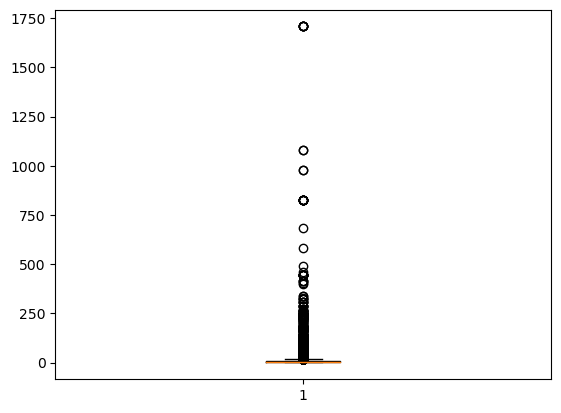

In [201]:
plt.boxplot(op_times/60/24)

In [186]:
np.nanmax(time_diff[:,2]), cids[np.nanargmax(time_diff[:,2])]

(3944880.0, 127384761)

In [181]:
list_diff

[3110400, 3430585, 540, -4460, 480]

(array([6.0000e+00, 2.2656e+04, 6.5530e+03, 4.5690e+03, 3.5030e+03,
        3.5120e+03, 2.4220e+03, 2.1350e+03, 1.4730e+03, 8.4300e+02]),
 array([-936845. , -292885.5,  351074. ,  995033.5, 1638993. , 2282952.5,
        2926912. , 3570871.5, 4214831. , 4858790.5, 5502750. ]),
 <a list of 10 Patch objects>)

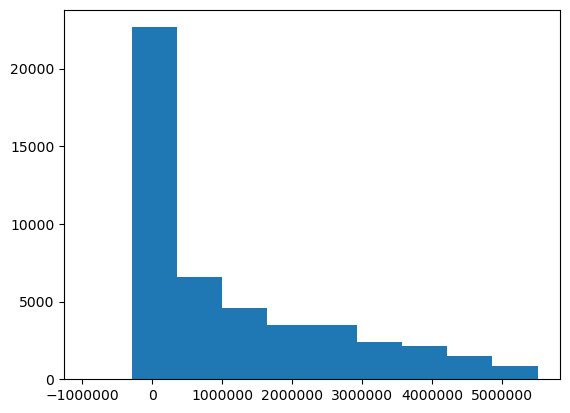

In [136]:
import sys
sys.path.append('./.local/lib/python3.8/site-packages')
sys.path.append('/usr/lib/python3/dist-packages')

import matplotlib.pyplot as plt

plt.hist(time_diff[:,1])

In [144]:
lab_diff = time_diff[:,1]
np.nanmin(lab_diff)/60/24, np.nanmax(lab_diff)/60/24, np.nanargmax(lab_diff)

(-650.5868055555555, 3821.3541666666665, 99)

In [83]:
df_op[df_op['subject_id']==124148791]

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
2130,427624267,124148791,200891372,NaN,0,50,M,64.0,167.0,Asian,...,905.0,0,1440,805.0,910.0,NaN,NaN,NaN,NaN,NaN
3743,423121047,124148791,247410052,NaN,171360,50,M,64.0,167.0,Asian,...,172235.0,169920,172800,172200.0,172240.0,NaN,NaN,NaN,NaN,NaN
5357,487358767,124148791,261071566,NaN,325440,50,M,64.0,166.0,Asian,...,326035.0,324000,326880,325980.0,326025.0,NaN,NaN,NaN,NaN,NaN
6945,434562604,124148791,211752596,NaN,483840,50,M,64.0,166.0,Asian,...,484860.0,482400,485280,484805.0,484865.0,NaN,NaN,NaN,NaN,NaN
17906,484344235,124148791,252678798,NaN,1524960,55,M,64.0,167.0,Asian,...,1525640.0,1523520,1526400,1525605.0,1525645.0,NaN,NaN,NaN,NaN,NaN
45821,438894257,124148791,273938352,-16506.0,4417920,60,M,64.0,167.0,Asian,...,4418435.0,4416480,4419360,4418405.0,4418435.0,NaN,NaN,NaN,NaN,NaN
46314,437618906,124148791,234382710,NaN,4468320,60,M,64.0,167.0,Asian,...,4468955.0,4466880,4469760,4468940.0,4468955.0,NaN,NaN,NaN,NaN,NaN


In [84]:
df_op[df_op['subject_id']==147473251]

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
22135,430299995,147473251,242918573,NaN,50400,75,M,NaN,165.0,Asian,...,51245.0,0,73440,51145.0,51260.0,NaN,NaN,NaN,NaN,NaN
22733,454517590,147473251,200247009,NaN,106560,75,M,NaN,162.0,Asian,...,107170.0,105120,123840,107050.0,107175.0,NaN,NaN,NaN,NaN,NaN
35519,401721359,147473251,246137863,NaN,1447200,80,M,72.0,162.0,Asian,...,1448605.0,1421280,1755360,1448020.0,1448610.0,1448170.0,1448510.0,1445715.0,1455255.0,NaN
35621,419291455,147473251,246137863,NaN,1460160,80,M,NaN,165.0,Asian,...,1461370.0,1421280,1755360,1461265.0,1461380.0,NaN,NaN,1456975.0,1535800.0,NaN
36423,457482314,147473251,246137863,NaN,1536480,80,M,NaN,NaN,Asian,...,1537785.0,1421280,1755360,1537720.0,1537770.0,NaN,NaN,NaN,NaN,NaN
36447,496826332,147473251,246137863,NaN,1539360,80,M,NaN,NaN,Asian,...,1540795.0,1421280,1755360,1540735.0,1540795.0,NaN,NaN,NaN,NaN,NaN
36465,441787424,147473251,246137863,NaN,1542240,80,M,NaN,NaN,Asian,...,1543400.0,1421280,1755360,1543355.0,1543400.0,NaN,NaN,NaN,NaN,NaN
36533,494283466,147473251,246137863,NaN,1546560,80,M,NaN,NaN,Asian,...,1547790.0,1421280,1755360,1547750.0,1547790.0,NaN,NaN,NaN,NaN,NaN
36576,442893746,147473251,246137863,NaN,1552320,80,M,NaN,NaN,Asian,...,1553265.0,1421280,1755360,1553240.0,1553275.0,NaN,NaN,NaN,NaN,NaN
36645,476170310,147473251,246137863,NaN,1556640,80,M,NaN,NaN,Asian,...,1557660.0,1421280,1755360,1557620.0,1557660.0,NaN,NaN,NaN,NaN,NaN


In [96]:
import numpy as np

times = df_op.apply(lambda x: x['discharge_time']-x['admission_time'], axis = 1).tolist()
np.sum(np.array(times)==0)

4383

In [88]:
df_vitals[df_vitals['subject_id']==147473251]

,op_id,subject_id,chart_time,item_name,value
7429290,430299995,147473251,51150,rr,3.0
7429291,430299995,147473251,51155,rr,14.0
7429292,430299995,147473251,51160,rr,12.0
7429293,430299995,147473251,51165,rr,12.0
7429294,430299995,147473251,51170,rr,11.0
...,...,...,...,...,...
26098815,424879435,147473251,1607780,vt,208.0
26098816,424879435,147473251,1607780,pip,2.0
26098817,424879435,147473251,1607780,pmean,1.0
26098818,424879435,147473251,1607780,fio2,97.5


# Vocab

In [24]:
import csv
import pandas as pd

with open('vocab/VOCABULARY.csv', encoding="utf8") as f:
    reader = csv.reader(f)
    csv_list = []
    for l in reader:
        csv_list.append(l)
        
df_vocab = pd.DataFrame(csv_list)
#df_vocab = pd.read_csv(f'vocab/VOCABULARY.csv')
df_vocab

,0,1,2,3
0,vocabulary_id\tvocabulary_name\tvocabulary_ref...,None,None,None
1,Episode Type\tOMOP Episode Type\tOMOP generate...,None,None,None
2,Obs Period Type\tOMOP Observation Period Type\...,None,None,None
3,CIViC\tClinical Interpretation of Variants in ...,None,None,None
4,OncoKB\tOncology Knowledge Base (MSK)\thttps:/...,None,None,None
...,...,...,...,...
122,MMI\tModernizing Medicine (MMI)\tMMI proprieta...,None,None,None
123,SMQ\tStandardised MedDRA Queries (MSSO)\thttp:...,None,None,None
124,Gender\tOMOP Gender\tOMOP generated\t\t44819108,None,None,None
125,GCN_SEQNO\tClinical Formulation ID (FDB)\tFDB ...,None,None,None


In [1]:
import csv
import pandas as pd

df_vocab = pd.read_csv(f'vocab/VOCABULARY.csv', sep='\t', on_bad_lines='error')
df_concept_rel = pd.read_csv(f'vocab/CONCEPT_RELATIONSHIP.csv', sep='\t', on_bad_lines='error')